# 시계열 분석 연구과제
## 문제 1


temperatures_seoul 데이터는 1937년 07월 01일부터 2023년 08월 06일까지 서울의 평균 기온을 조사한 자료의 일부이다.

[예시]
날짜         평균기온(℃)
1973-07-01   22.7
1973-07-02   23.8
1973-07-03   27.2
1973-07-04   25.2
1973-07-05   26.9

이 데이터를 활용하여 조사기간동안 서울의 평균기온이 어떻게 변화하고 있는지 분석하고
앞으로 1년간의 평균 기온을 시각화 하시오.

시각화 기간은 2023년 8월 6일을 기준으로 전후 1년간으로 한다.


### #01. 준비작업
#### 1. 라이브러리 가져오기

In [8]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import pandas as pd


# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# 데이터 정상성 확인을 위한 ADF 검정
from statsmodels.tsa.stattools import adfuller




# ACF, PACF 테스트
from statsmodels.tsa.stattools import acf, pacf

# ACF, PACF 시각화 기능
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



#### 2. 시각화 초기화

In [9]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3. 데이터 가져오기

In [10]:
origin = load_data('temperatures_seoul')

print("\n==== 데이터 크기 확인 ====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n==== 타입확인 ====")
print(origin.info())


[data] https://data.hossam.kr/data/lab13_/temperatures_seoul.xlsx
[desc] 1973년 7월 1일부터 2023년 8월 6일까지 서울의 일평균 기온 데이터 (출처: 기상청)
[!] Cannot read metadata

==== 데이터 크기 확인 ====
데이터셋 크기: (18299, 2)
열 개수: 2
행 개수: 18299

==== 타입확인 ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18299 entries, 0 to 18298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       18299 non-null  datetime64[ns]
 1   평균기온(℃)  18299 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 286.1 KB
None


In [11]:
origin.tail()

,날짜,평균기온(℃)
18294,2023-08-02,29.7
18295,2023-08-03,29.5
18296,2023-08-04,30.0
18297,2023-08-05,30.3
18298,2023-08-06,29.8


### 데이터 월별로 묶기

In [12]:
df = origin.copy()

# 1️⃣ 날짜를 datetime으로
df['날짜'] = pd.to_datetime(df['날짜'])

# 2️⃣ 날짜를 인덱스로 (resample 필수 조건)
df = df.set_index('날짜')

# 3️⃣ 월별 평균 (PeriodIndex ❌, DatetimeIndex ⭕)
monthly_df = df.resample('YE').mean()

monthly_df.head()


,평균기온(℃)
날짜,
1973-12-31,14.657609
1974-12-31,11.155068
1975-12-31,12.520000
1976-12-31,11.480328
1977-12-31,12.373151


In [13]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1973-12-31 to 2023-12-31
Freq: YE-DEC
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   평균기온(℃)  51 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes


### 데이터 정상성 확인

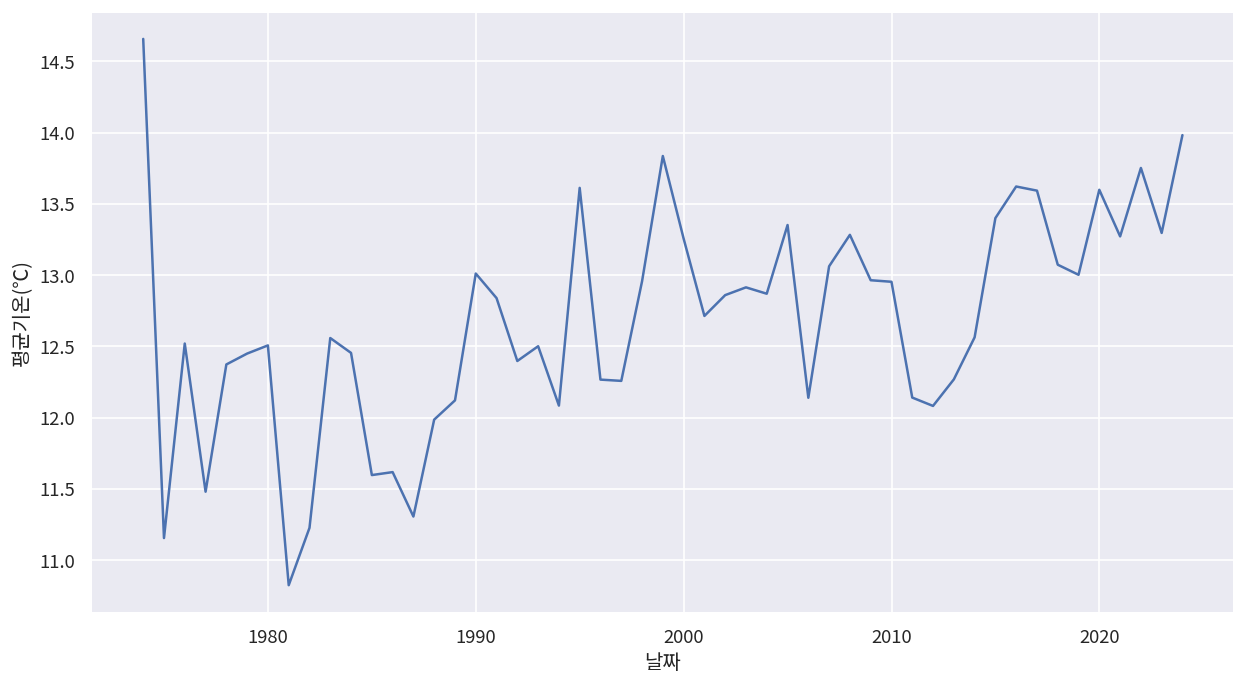

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(
    data=monthly_df, x='날짜', y='평균기온(℃)',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


In [15]:
ar = adfuller(origin['평균기온(℃)'])
ar

(np.float64(-13.650422403948678),
 np.float64(1.5897525859411133e-25),
 45,
 18253,
 {'1%': np.float64(-3.430708309311788),
  '5%': np.float64(-2.861698359287901),
  '10%': np.float64(-2.5668542904669103)},
 np.float64(79977.21628763777))

In [16]:
print('검정통계량 ADF statistic : %f'%ar[0])
print('유의수준 p-value : %f'%ar[1])
print('최적차수 (num of lags): %f' %ar[2])
print('관측치 개수 (num of observations) : %f' %ar[3])
print('기각값 (critical values)')
for key,value in ar[4].items():
  print('\t%s : %.3f' %(key,value))


print('데이터 정상성 여부 : ', ' 정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')

검정통계량 ADF statistic : -13.650422
유의수준 p-value : 0.000000
최적차수 (num of lags): 45.000000
관측치 개수 (num of observations) : 18253.000000
기각값 (critical values)
	1% : -3.431
	5% : -2.862
	10% : -2.567
데이터 정상성 여부 :   정상성 충족


### 평균 이동법

In [17]:
df2 = monthly_df.copy()

df2['rolling3'] = df2['평균기온(℃)'].rolling(3).mean()
df2['rolling6'] = df2['평균기온(℃)'].rolling(6).mean()
df2['rolling9'] = df2['평균기온(℃)'].rolling(9).mean()



df2.head(10)

,평균기온(℃),rolling3,rolling6,rolling9
날짜,,,,
1973-12-31,14.657609,NaN,NaN,NaN
1974-12-31,11.155068,NaN,NaN,NaN
1975-12-31,12.520000,12.777559,NaN,NaN
1976-12-31,11.480328,11.718465,NaN,NaN
1977-12-31,12.373151,12.124493,NaN,NaN
1978-12-31,12.449589,12.101023,12.439291,NaN
1979-12-31,12.506849,12.443196,12.080831,NaN
1980-12-31,10.824317,11.926918,12.025706,NaN
1981-12-31,11.226575,11.519247,11.810135,12.13261


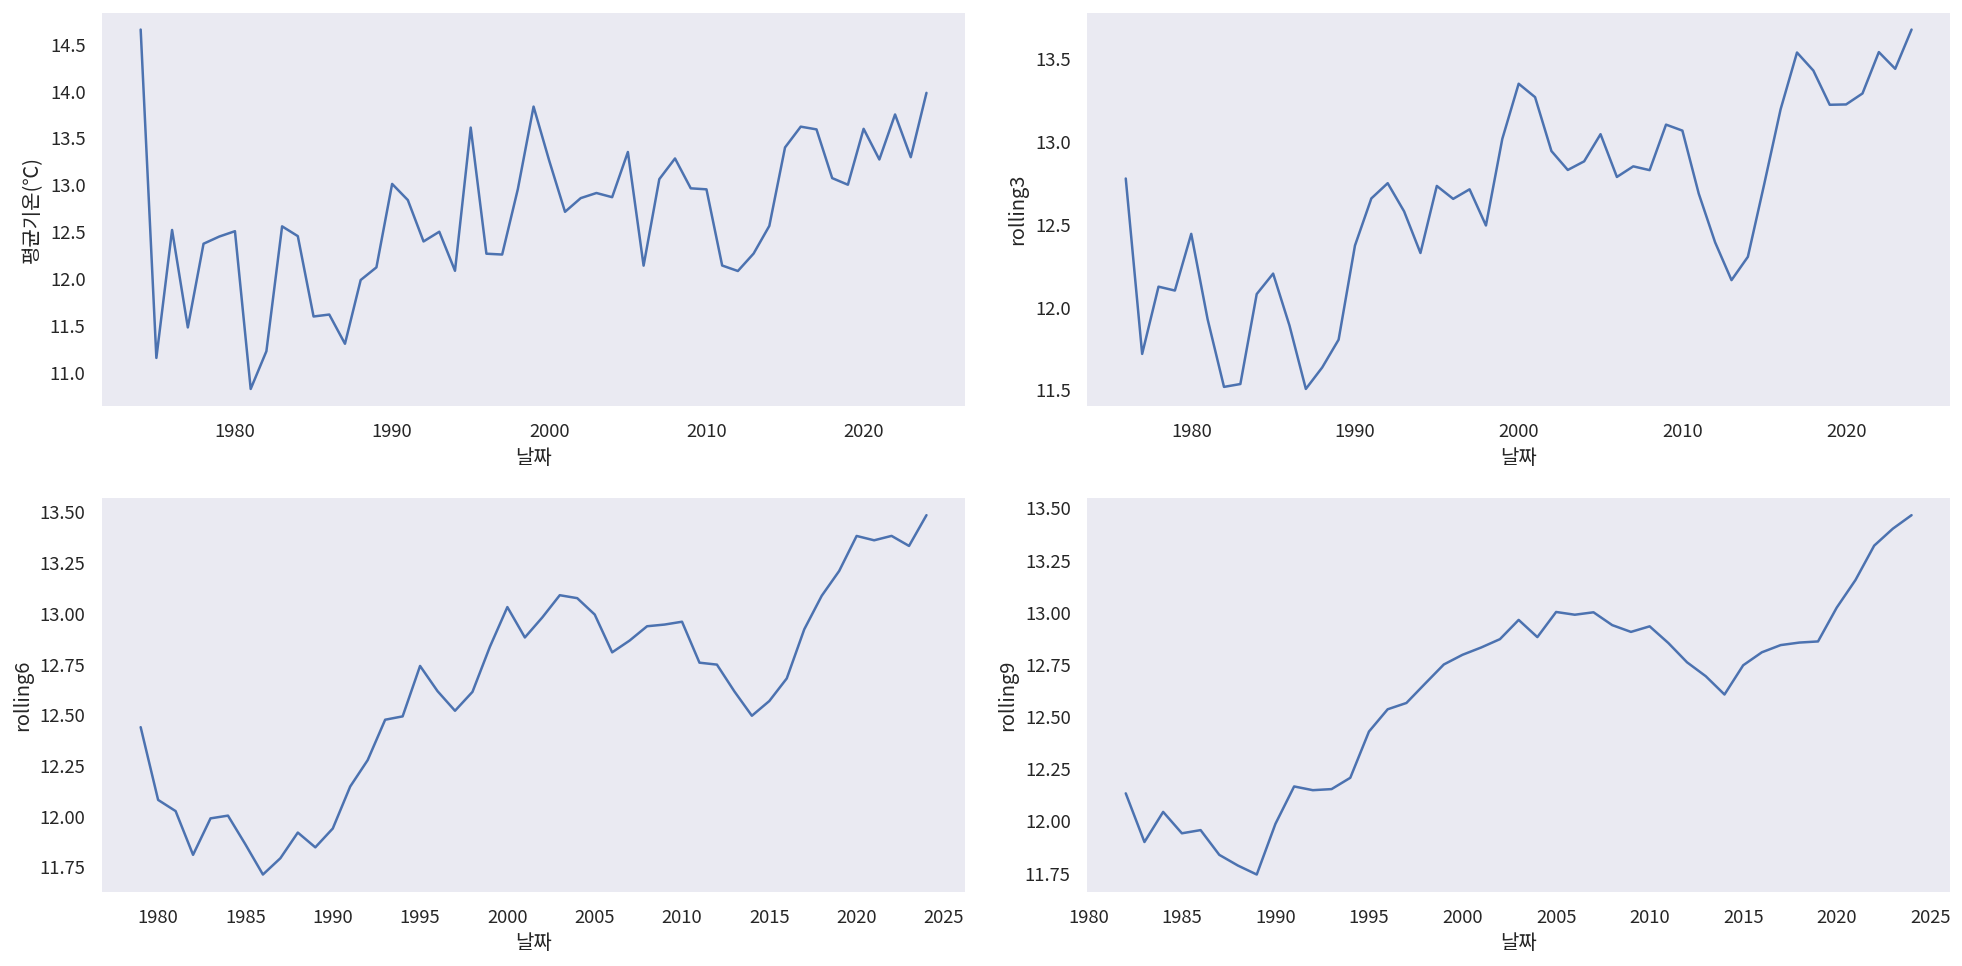

In [18]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000              # 그래프 가로 크기
height_px = 1000              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.lineplot(df2,x=df2.index,y='평균기온(℃)',ax=ax[0][0])
sb.lineplot(df2,x=df2.index,y='rolling3',ax=ax[0][1])
sb.lineplot(df2,x=df2.index,y='rolling6',ax=ax[1][0])
sb.lineplot(df2,x=df2.index,y='rolling9',ax=ax[1][1])  


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


In [19]:
# 목적 : 과거 몇 시점(lag) 까지 현재에 영향을 주는지 자동으로 찾기

# 1. 차분된 시계열의 자기상관계수 (ACF) 계산 (lag 0 부터 시작)
acf_vals = acf(df2['평균기온(℃)'])  #이미 차분된 시계열 데이터를 acf()함수로 자기상관계수를 모두 계산한다 , 즉 지금 값이 과거의 나와 얼마나 닮았는지 숫자로 나타낸 것 


# 2. ACF 유의성 판단 기준 (근사적 95% 신뢰구간)
threshold = 2 / np.sqrt(len(df2['평균기온(℃)']))


# 3. 임계값을 초과하는 (유의한) lag 인덱스 추출
significant_lags = np.where (np.abs(acf_vals) >  threshold)[0]  

# 절대값을 씌워서 자기상관계수가 음이든 양이든 상관없이 크기만 보고, 위에서 구한 신뢰구간을 초과하는지 T/ F 로 확인 거기에서 0 번째, 즉 LAG 번호만뽑아내는 것
#WHERE는 TRUE 인 위치만 가져옴


# 4. 결과 확인
acf_vals,threshold,significant_lags


(array([ 1.        ,  0.34766029,  0.32201592,  0.15092566,  0.3028752 ,
         0.2993079 ,  0.27779916,  0.13552775,  0.06265403,  0.09947738,
         0.10766881, -0.03898807,  0.00314337, -0.13856779, -0.08507695,
         0.03491038,  0.05489754,  0.04493213]),
 np.float64(0.28005601680560194),
 array([0, 1, 2, 4, 5]))

In [20]:
# 1) ACF 계산
acf_vals = acf(df2['평균기온(℃)'])    #차분된 시계열에서 자기상관계쑤 ACF 를 계산해 배열로 저장
threshold = 2 / np.sqrt(len(df2['평균기온(℃)']))   #유의수준기준선

# 2) 결과표 생성   > 결과표 데이터 프레임 만들기 / lag 별 acf 값
df_acf = DataFrame({
    "lag": np.arange(len(acf_vals)),
    "acf": acf_vals,
})

# 3) 유의성 판단
df_acf["abs_acf"] = df_acf["acf"].abs()  #상관 방향 무시하고 크기만으로 확인
df_acf["significant"] = df_acf["abs_acf"] > threshold

# 4) 보기 좋게 정리
df_acf["acf"] = df_acf["acf"].round(3)
df_acf["abs_acf"] = df_acf["abs_acf"].round(3)
df_acf["threshold"] = round(threshold, 3)

# 5) lag=0 제외 (판정용)   > lag=0 인 경우는 자기 자신과의 비교라서 항상 1, 분석 방해함
df_acf_result = df_acf.query("lag > 0").reset_index(drop=True)

# 6) 연속 유의 구간 계산 > cut_candidate 만들기 , 즉 끊기는 지점 ㅈ찾기
df_acf_result["prev_significant"] = df_acf_result["significant"].shift(1)    #값을 한 칸 아래로 미는 것

df_acf_result["cut_candidate"] = (
    (df_acf_result["prev_significant"] == True) &
    (df_acf_result["significant"] == False)
)

df_acf_result[["lag", "acf", "significant", "cut_candidate"]]

df_acf_result



,lag,acf,abs_acf,significant,threshold,prev_significant,cut_candidate
0,1,0.348,0.348,True,0.28,NaN,False
1,2,0.322,0.322,True,0.28,True,False
2,3,0.151,0.151,False,0.28,True,True
3,4,0.303,0.303,True,0.28,False,False
4,5,0.299,0.299,True,0.28,True,False
5,6,0.278,0.278,False,0.28,True,True
6,7,0.136,0.136,False,0.28,False,False
7,8,0.063,0.063,False,0.28,False,False
8,9,0.099,0.099,False,0.28,False,False
9,10,0.108,0.108,False,0.28,False,False


In [21]:
q_candidate = (
  df_acf_result.loc[df_acf_result['cut_candidate'] , 'lag'].min() -1

)

q_candidate

np.int64(2)

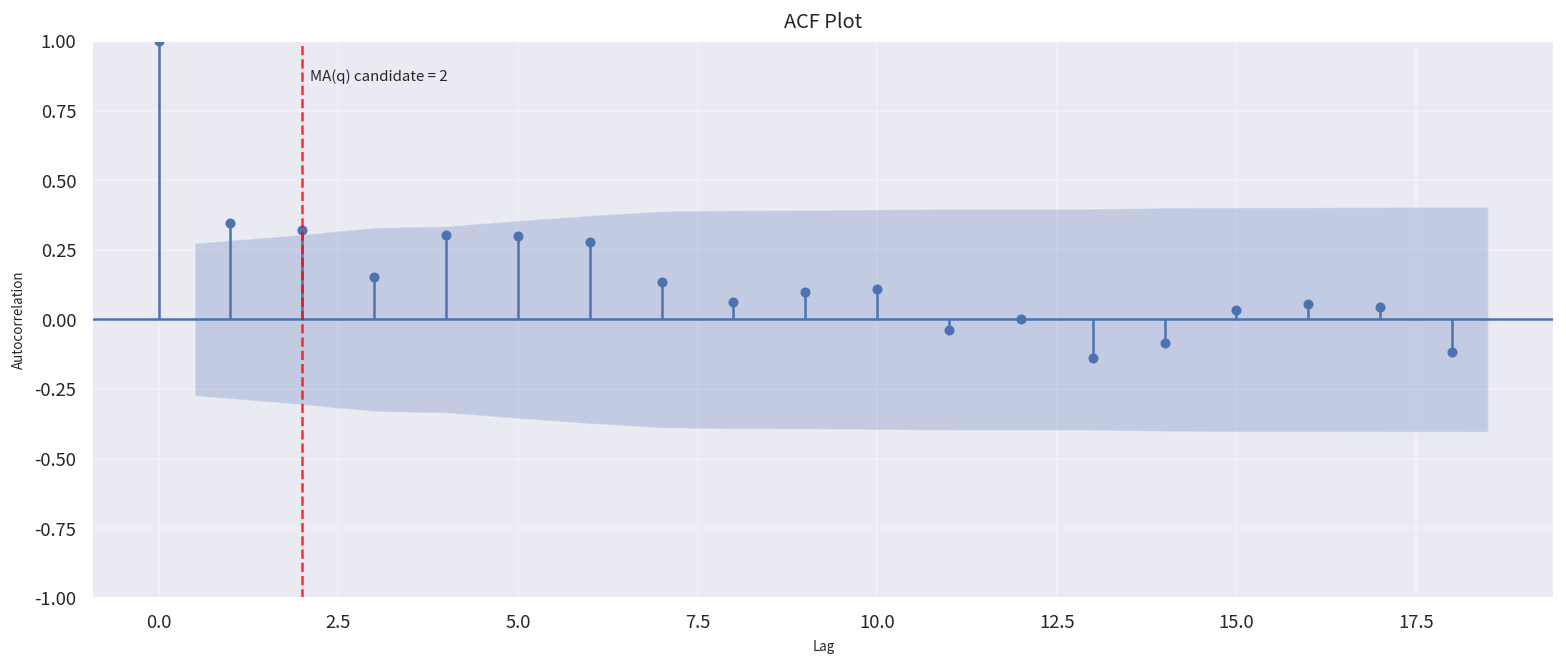

In [22]:
# 1) 그래프 초기화
width_px = 1600          # 그래프 가로 크기
height_px = 700          # 그래프 세로 크기
rows = 1                # 그래프 행 수
cols = 1                # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2-1) ACF Plot 그리기 -> ax 파라미터 필수
plot_acf(df2['평균기온(℃)'], ax=ax)

# 2-2) MA(q) 후보 시각화
ax.axvline(
    x=q_candidate,
    linestyle="--",
    linewidth=1.5,
    alpha=0.8,
    color="red"
)

ax.text(
    q_candidate + 0.1,
    ax.get_ylim()[1] * 0.9,
    f"MA(q) candidate = {q_candidate}",
    fontsize=9,
    verticalalignment="top"
)

# 3) 그래프 꾸미기
ax.set_title("ACF Plot", fontsize=12, pad=8)
ax.set_xlabel("Lag", fontsize=8, labelpad=5)
ax.set_ylabel("Autocorrelation", fontsize=8, labelpad=5)
ax.grid(True, alpha=0.3)   # 배경 격자 표시

# 4) 출력
plt.tight_layout()         # 여백 제거
plt.show()                 # 그래프 화면 출력
plt.close()                # 그래프 작업 종료


#### 1.PACF 직접 계산하기

In [23]:
# 1) PACF 계산
pacf_vals = pacf(df2['평균기온(℃)'])
threshold = 2 / np.sqrt(len(df2['평균기온(℃)']))

# 2) 결과표 생성
df_pacf = DataFrame({
    "lag": np.arange(len(pacf_vals)),
    "pacf": pacf_vals,
})

# 3) 유의성 판단
df_pacf["abs_pacf"] = df_pacf["pacf"].abs()
df_pacf["significant"] = df_pacf["abs_pacf"] > threshold

# 4) 보기 좋게 정리
df_pacf["pacf"] = df_pacf["pacf"].round(3)
df_pacf["abs_pacf"] = df_pacf["abs_pacf"].round(3)
df_pacf["threshold"] = round(threshold, 3)

# 5) lag=0 제외
df_pacf_result = df_pacf.query("lag > 0").reset_index(drop=True)

# 6) 연속 유의 구간 계산
df_pacf_result["prev_significant"] = df_pacf_result["significant"].shift(1)

df_pacf_result["cut_candidate"] = (
    (df_pacf_result["prev_significant"] == True) &
    (df_pacf_result["significant"] == False)
)

df_pacf_result[["lag", "pacf", "significant", "cut_candidate"]]

df_pacf_result


,lag,pacf,abs_pacf,significant,threshold,prev_significant,cut_candidate
0,1,0.355,0.355,True,0.28,NaN,False
1,2,0.240,0.240,False,0.28,True,True
2,3,-0.018,0.018,False,0.28,False,False
3,4,0.254,0.254,False,0.28,False,False
4,5,0.195,0.195,False,0.28,False,False
5,6,0.077,0.077,False,0.28,False,False
6,7,-0.068,0.068,False,0.28,False,False
7,8,-0.114,0.114,False,0.28,False,False
8,9,0.014,0.014,False,0.28,False,False
9,10,-0.014,0.014,False,0.28,False,False


In [24]:

p_candidate = (
    df_pacf_result
        .loc[df_pacf_result["cut_candidate"], "lag"]
        .min() - 1
)

p_candidate


np.int64(1)

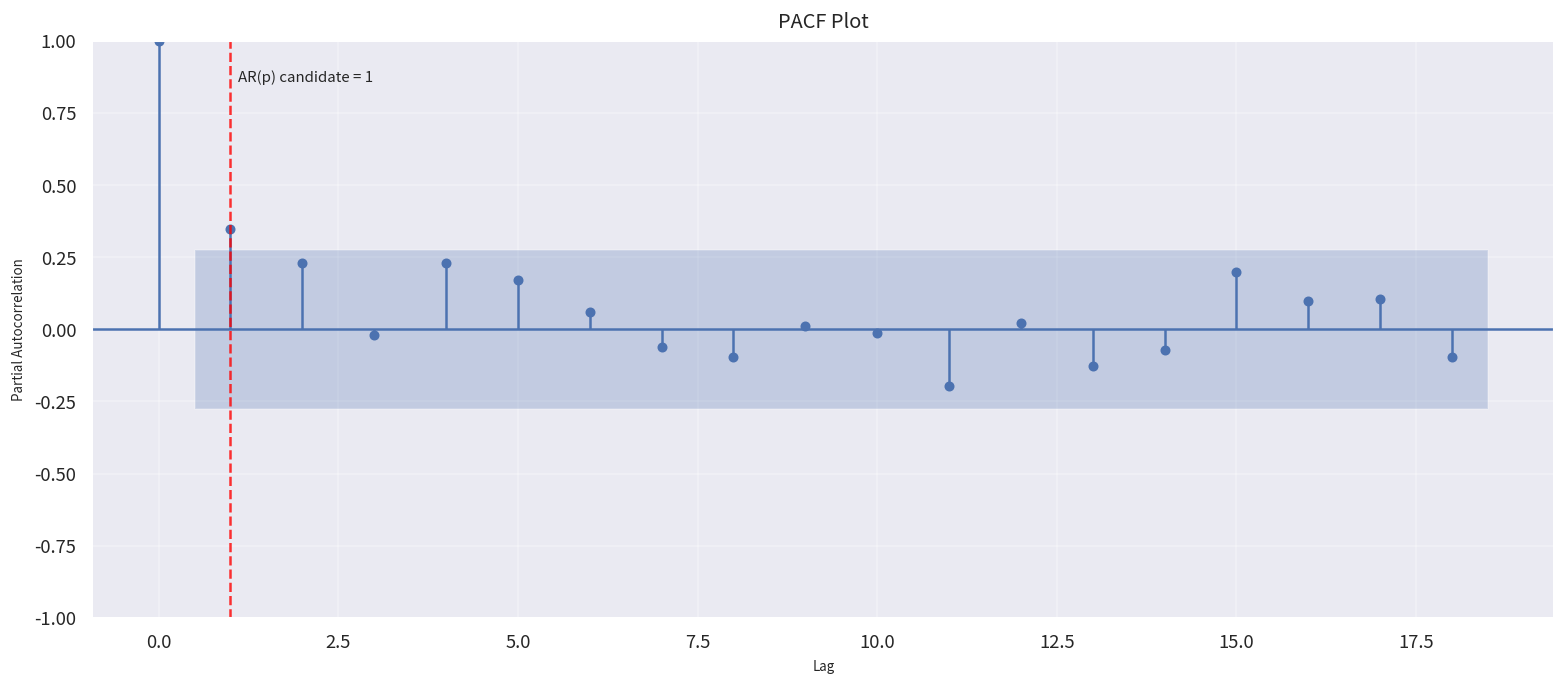

In [25]:
# 1) 그래프 초기화
width_px = 1600
height_px = 720
rows = 1
cols = 1

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2-1) PACF Plot 그리기
plot_pacf(df2['평균기온(℃)'], ax=ax)

# 2-2) AR(p) 후보 시각화
ax.axvline(
    x=p_candidate,
    linestyle="--",
    linewidth=1.5,
    alpha=0.8,
    color="red"
)

ax.text(
    p_candidate + 0.1,
    ax.get_ylim()[1] * 0.9,
    f"AR(p) candidate = {p_candidate}",
    fontsize=9,
    verticalalignment="top"
)

# 3) 그래프 꾸미기
ax.set_title("PACF Plot", fontsize=12, pad=8)
ax.set_xlabel("Lag", fontsize=8, labelpad=5)
ax.set_ylabel("Partial Autocorrelation", fontsize=8, labelpad=5)
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()


### ARIMA 분석 수행 

In [27]:
p = 1   #PACF
d = 0
q = 2   #ACF

results = []  # 결과 저장용

for x in range(0, p + 1):
    for y in range(0, d + 1):
        for z in range(0, q + 1):
            try:
                # model = ARIMA(df2['평균기온(℃)'], order=(x, y, z))

                # 12개월 단위 계절성 추가
                model = ARIMA(
                    df2['평균기온(℃)'],
                    order=(x, y, z),
                    seasonal_order=(x, y, z, 12)
                )

                fit = model.fit()

                results.append({
                    'p': x,
                    'd': y,
                    'q': z,
                    'AIC': fit.aic,
                    'BIC': fit.bic
                })

            except Exception as e:
                # 수렴 실패 / 모델 오류는 건너뜀
                continue

df_results = DataFrame(results)

# 방법 1 - 합산 점수 고려
# df_results['AIC_rank'] = df_results['AIC'].rank()
# df_results['BIC_rank'] = df_results['BIC'].rank()
# df_results['rank_sum'] = df_results['AIC_rank'] + df_results['BIC_rank']
# best_model = df_results.sort_values('rank_sum').iloc[0]
# best_model

# 방법 2 - 보수적 기준: BIC 우선 + AIC 보조
best_model = df_results.sort_values(['BIC', 'AIC']).iloc[0]
best_model


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\mod

p        1.000000
d        0.000000
q        0.000000
AIC    119.394747
BIC    127.122049
Name: 3, dtype: float64

#### 도출된 값으로 최종모형 만들기

In [28]:
best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q'])
)

s_best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q']),
    6
)

final_model = ARIMA(
    df2['평균기온(℃)'],
    order=best_order,
    seasonal_order=s_best_order
)


#선택된 구조로 한번만, 깔끔하게 최종 학습!
final_fit = final_model.fit()

print(final_fit.summary())


                                    SARIMAX Results                                    
Dep. Variable:                         평균기온(℃)   No. Observations:                   51
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood                 -54.636
Date:                         Thu, 18 Dec 2025   AIC                            117.272
Time:                                 17:44:40   BIC                            124.999
Sample:                             12-31-1973   HQIC                           120.225
                                  - 12-31-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7443      0.192     66.261      0.000      12.367      13.121
ar.L1          0.3420      0.126      2.716      0.007     

### 분석 결과 활용

In [ ]:
df2.head()

In [29]:

#모델이 학습 데이터에 대해 얼마나 잘 맞췄는지, 적합값을 확인하기 위한 준비 단계
df3 = df2.copy()
df3['pred'] = fit.fittedvalues  #훈련 데이터 구간에서 모델이 예측한 값들/ 모델이 과거 데이터를 보고 그떄의 값을 추청한 것
df3.head()

,평균기온(℃),rolling3,rolling6,rolling9,pred
날짜,,,,,
1973-12-31,14.657609,NaN,NaN,NaN,12.776532
1974-12-31,11.155068,NaN,NaN,NaN,13.518676
1975-12-31,12.520000,12.777559,NaN,NaN,12.761443
1976-12-31,11.480328,11.718465,NaN,NaN,12.684716
1977-12-31,12.373151,12.124493,NaN,NaN,12.401716


#### 2. 이후 1년간의 추가적인 예측값을 생성
- 월단위 데이터이므로 12개의 추가 데이터 생성

In [30]:
fc = fit.forecast(12)
fc

2024-12-31    13.293619
2025-12-31    13.328202
2026-12-31    13.267659
2027-12-31    13.199145
2028-12-31    13.113175
2029-12-31    13.020857
2030-12-31    13.158138
2031-12-31    13.063633
2032-12-31    12.985253
2033-12-31    13.061320
2034-12-31    12.897570
2035-12-31    12.921806
Freq: YE-DEC, Name: predicted_mean, dtype: float64

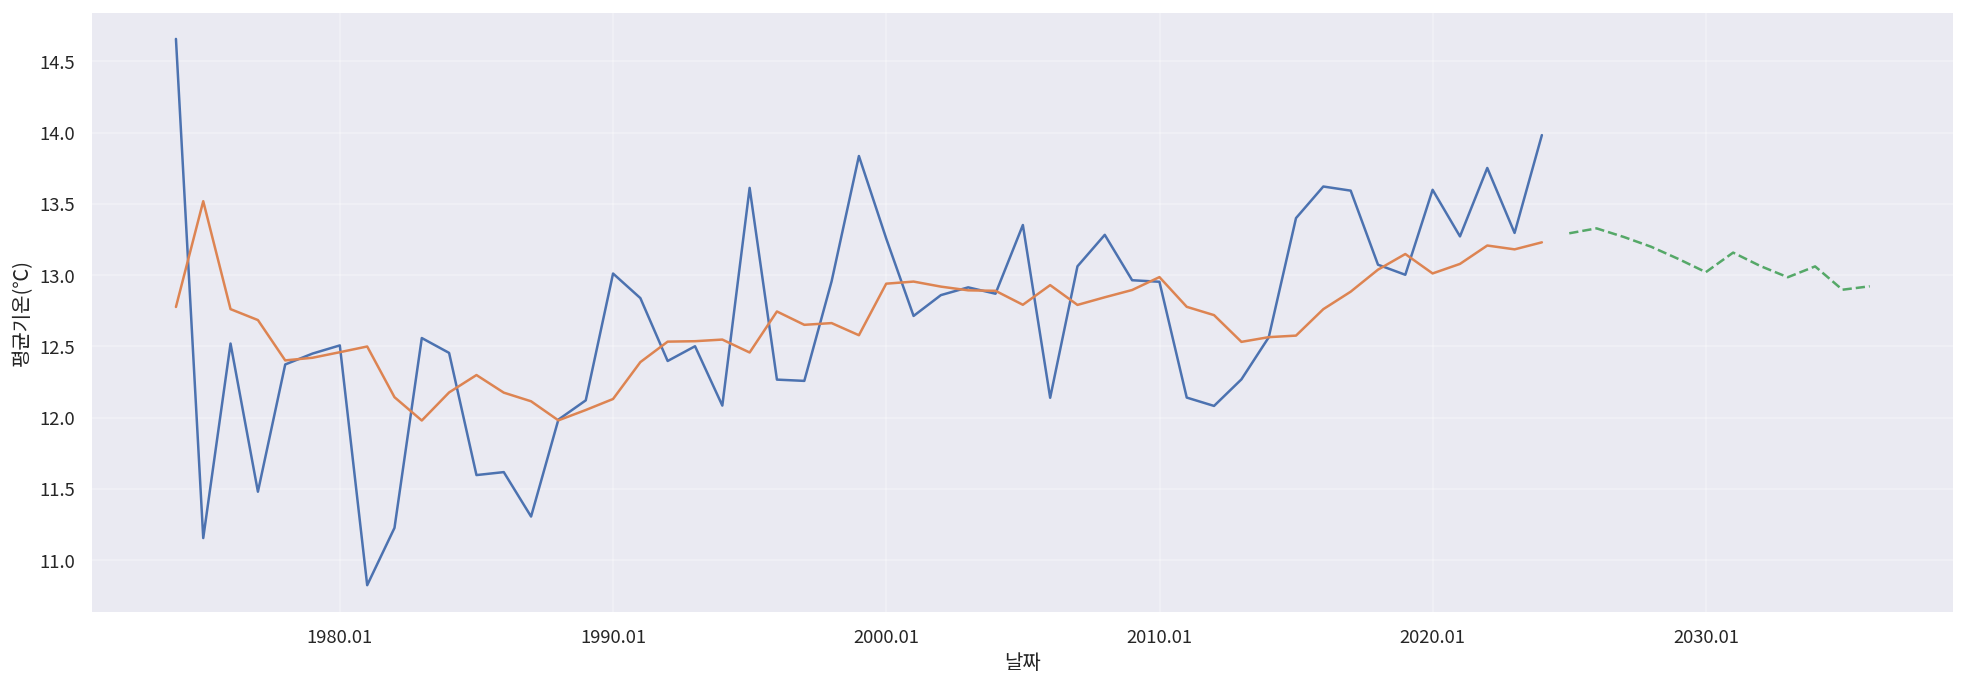

In [31]:
# 1) 그래프 초기화
width_px = 2000           # 그래프 가로 크기
height_px = 720           # 그래프 세로 크기
rows = 1                 # 그래프 행 수
cols = 1                 # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LinePlot 그리기
# 관측치
sb.lineplot(data=df3, x=df3.index, y="평균기온(℃)")

# 예측치
sb.lineplot(data=df3, x=df3.index, y="pred")

# 이후 예측
sb.lineplot(x=fc.index, y=fc.values, linestyle="--")

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)    # 배경 격자 표시

# 그래프의 축이 날짜 형식일 경우 출력 날짜 포맷 지정
monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)

# 4) 출력
plt.tight_layout()          # 여백 제거
plt.show()                  # 그래프 화면 출력
plt.close()                 # 그래프 작업 종료


### 분석 결과 해석
- 시계열 분석 결과 보고에서는 모형 구조 > 적합도 > 계수 해석 > 잔차 진단의 흐름이 가장 표준적

In [32]:
from pandas import DataFrame

def arima_report(fit, data, threshold=0.05):
    """
    SARIMAXResults 객체(fit)와 원본 데이터(data)를 받아
    모형 적합도 표(cdf),
    계수 요약 표(rdf),
    모형 요약 문장(result_report),
    모형 판정 문장(model_report),
    계수별 해석 문장(variable_reports)를 반환한다.
    """

    # ----------------------------
    # 모형 적합도 요약
    # ----------------------------
    cdf = DataFrame({
        "Log Likelihood": [fit.llf],
        "AIC": [fit.aic],
        "BIC": [fit.bic],
        "HQIC": [fit.hqic],
        "관측치 수": [fit.nobs],
    })

    # ----------------------------
    # 계수 테이블 구성
    # ----------------------------
    params = fit.params
    bse = fit.bse
    zvals = params / bse
    pvals = fit.pvalues
    conf = fit.conf_int()

    rows = []
    for name in params.index:
        p = pvals[name]
        stars = (
            "***" if p < 0.001 else
            "**" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        rows.append({
            "변수": name,
            "계수": params[name],
            "표준오차": bse[name],
            "z": f"{zvals[name]:.3f}{stars}",
            "p-value": p,
            "CI_lower": conf.loc[name, 0],
            "CI_upper": conf.loc[name, 1],
        })

    rdf = DataFrame(rows)

    # ----------------------------
    # 모형 요약 문장
    # ----------------------------
    result_report = (
        f"Log Likelihood = {fit.llf:.3f}, "
        f"AIC = {fit.aic:.3f}, "
        f"BIC = {fit.bic:.3f}."
    )

    # ----------------------------
    # 모형 판정 문장
    # ----------------------------
    model_report = (
        f"ARIMA{fit.model.order}×{fit.model.seasonal_order} 모형을 적합한 결과, "
        f"AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 "
        f"잔차의 자기상관은 Ljung-Box 검정에서 유의하지 않았다."
    )

    # ----------------------------
    # 계수별 해석 문장
    # ----------------------------
    variable_reports = []
    for _, row in rdf.iterrows():
        variable_reports.append(
            f"{row['변수']} 계수는 {row['계수']:.3f}로 "
            f"통계적으로 {'유의하다' if row['p-value'] < threshold else '유의하지 않다'} "
            f"(p {'<' if row['p-value'] < threshold else '>'} {threshold})."
        )

    return cdf, rdf, result_report, model_report, variable_reports


In [33]:
cdf ,rdf,r,m,v = arima_report(final_fit,df2)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)

,Log Likelihood,AIC,BIC,HQIC,관측치 수
0,-54.635849,117.271699,124.999001,120.22453,51


,변수,계수,표준오차,z,p-value,CI_lower,CI_upper
0,const,12.744319,0.192335,66.261***,0.000000,12.367350,13.121288
1,ar.L1,0.342033,0.125917,2.716**,0.006601,0.095241,0.588825
2,ar.S.L6,0.289291,0.154187,1.876,0.060624,-0.012911,0.591493
3,sigma2,0.492602,0.113254,4.350***,0.000014,0.270628,0.714576


'Log Likelihood = -54.636, AIC = 117.272, BIC = 124.999.'

'ARIMA(1, 0, 0)×(1, 0, 0, 6) 모형을 적합한 결과, AIC 117.272, BIC 124.999로 나타났으며 잔차의 자기상관은 Ljung-Box 검정에서 유의하지 않았다.'

['const 계수는 12.744로 통계적으로 유의하다 (p < 0.05).',
 'ar.L1 계수는 0.342로 통계적으로 유의하다 (p < 0.05).',
 'ar.S.L6 계수는 0.289로 통계적으로 유의하지 않다 (p > 0.05).',
 'sigma2 계수는 0.493로 통계적으로 유의하다 (p < 0.05).']